In [ ]:
!pip install xgboost==2.0.3


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import plotly.express as px

In [ ]:
df = pd.read_csv("adidas_sales.csv", sep=";")
data = df
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01.01.2020,Northeast,New York,New York,Men's Street Footwear,"50,00 $",1 200,"600 000,00 $","300 000,00 $",50 %,In-store
1,Foot Locker,1185732,02.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"50,00 $",1 000,"500 000,00 $","150 000,00 $",30 %,In-store
2,Foot Locker,1185732,03.01.2020,Northeast,New York,New York,Women's Street Footwear,"40,00 $",1 000,"400 000,00 $","140 000,00 $",35 %,In-store
3,Foot Locker,1185732,04.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"45,00 $",850,"382 500,00 $","133 875,00 $",35 %,In-store
4,Foot Locker,1185732,05.01.2020,Northeast,New York,New York,Men's Apparel,"60,00 $",900,"540 000,00 $","162 000,00 $",30 %,In-store
5,Foot Locker,1185732,06.01.2020,Northeast,New York,New York,Women's Apparel,"50,00 $",1 000,"500 000,00 $","125 000,00 $",25 %,In-store
6,Foot Locker,1185732,07.01.2020,Northeast,New York,New York,Men's Street Footwear,"50,00 $",1 250,"625 000,00 $","312 500,00 $",50 %,In-store
7,Foot Locker,1185732,08.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"50,00 $",900,"450 000,00 $","135 000,00 $",30 %,Outlet
8,Foot Locker,1185732,21.01.2020,Northeast,New York,New York,Women's Street Footwear,"40,00 $",950,"380 000,00 $","133 000,00 $",35 %,Outlet
9,Foot Locker,1185732,22.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"45,00 $",825,"371 250,00 $","129 938,00 $",35 %,Outlet


In [ ]:
df = data
print(df.columns)
df = df.drop(columns=['Retailer ID', 'Units Sold', 'Operating Profit', 'Operating Margin'], axis=1)

# Оставляем retailer, date, region, product, total sales (прогнозируем), sales method
df = df.drop(columns=['State', 'City'])
df.head(10)

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')


,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,"50,00 $","600 000,00 $",In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,"50,00 $","500 000,00 $",In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,"40,00 $","400 000,00 $",In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,"45,00 $","382 500,00 $",In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,"60,00 $","540 000,00 $",In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,"50,00 $","500 000,00 $",In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,"50,00 $","625 000,00 $",In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,"50,00 $","450 000,00 $",Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,"40,00 $","380 000,00 $",Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,"45,00 $","371 250,00 $",Outlet


In [ ]:
data2unix = lambda x: int(datetime.datetime.strptime(x, '%d.%m.%Y').timestamp())

In [ ]:
mask_dollar = lambda x: float(str(x).replace("$", "").replace(u"\xa0", "").replace(",", "."))
df["Total Sales"] = df["Total Sales"].apply(mask_dollar)
df["Price per Unit"] = df["Price per Unit"].apply(mask_dollar)
df.head(10)


,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,50.0,600000.0,In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,50.0,500000.0,In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,40.0,400000.0,In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,45.0,382500.0,In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,60.0,540000.0,In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,50.0,500000.0,In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,50.0,625000.0,In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,50.0,450000.0,Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,40.0,380000.0,Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,45.0,371250.0,Outlet


In [ ]:
df['Invoice Date'] = df['Invoice Date'].apply(data2unix)
df.head(10)

,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,1577836800,Northeast,Men's Street Footwear,50.0,600000.0,In-store
1,Foot Locker,1577923200,Northeast,Men's Athletic Footwear,50.0,500000.0,In-store
2,Foot Locker,1578009600,Northeast,Women's Street Footwear,40.0,400000.0,In-store
3,Foot Locker,1578096000,Northeast,Women's Athletic Footwear,45.0,382500.0,In-store
4,Foot Locker,1578182400,Northeast,Men's Apparel,60.0,540000.0,In-store
5,Foot Locker,1578268800,Northeast,Women's Apparel,50.0,500000.0,In-store
6,Foot Locker,1578355200,Northeast,Men's Street Footwear,50.0,625000.0,In-store
7,Foot Locker,1578441600,Northeast,Men's Athletic Footwear,50.0,450000.0,Outlet
8,Foot Locker,1579564800,Northeast,Women's Street Footwear,40.0,380000.0,Outlet
9,Foot Locker,1579651200,Northeast,Women's Athletic Footwear,45.0,371250.0,Outlet


In [ ]:
df = pd.get_dummies(df, columns=["Region", "Retailer", "Sales Method", "Product"], dtype=int)
# for column in ["Region", "Retailer", "Sales Method", "Product"]:
    #df[column] = pd.factorize(df[column])[0]
df.head(10)

,Invoice Date,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,1577836800,50.0,600000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1577923200,50.0,500000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1578009600,40.0,400000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1578096000,45.0,382500.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1578182400,60.0,540000.0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
5,1578268800,50.0,500000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6,1578355200,50.0,625000.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7,1578441600,50.0,450000.0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
8,1579564800,40.0,380000.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9,1579651200,45.0,371250.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


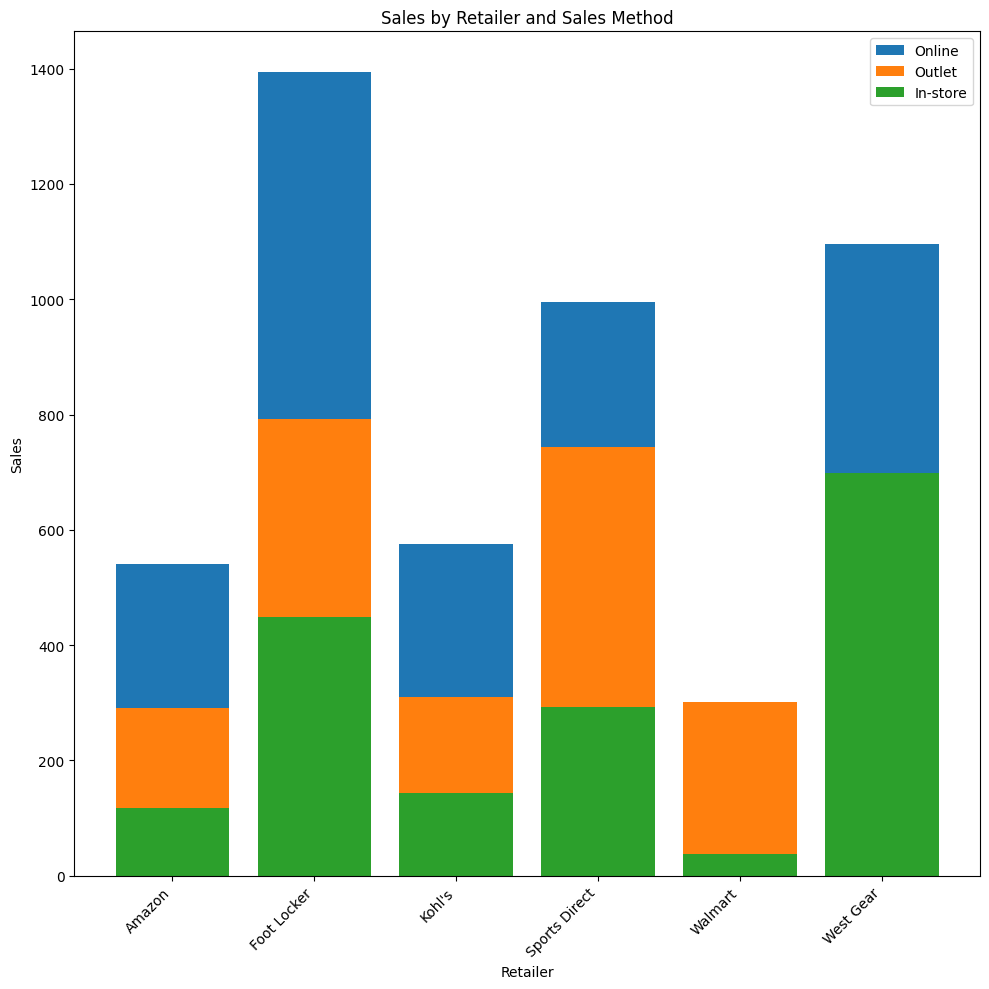

In [1]:
import matplotlib.pyplot as plt

# Данные о продажах по методам продаж для различных розничных магазинов
sales_data = {
    'Amazon': {'In-store': 118, 'Online': 540, 'Outlet': 291},
    'Foot Locker': {'In-store': 449, 'Online': 1395, 'Outlet': 793},
    "Kohl's": {'In-store': 144, 'Online': 576, 'Outlet': 310},
    'Sports Direct': {'In-store': 293, 'Online': 995, 'Outlet': 744},
    'Walmart': {'In-store': 37, 'Online': 288, 'Outlet': 301},
    'West Gear': {'In-store': 699, 'Online': 1095, 'Outlet': 580}
}

# Создаем гистограмму
fig, ax = plt.subplots(figsize=(10, 10))

# Получаем список всех розничных магазинов
retailers = list(sales_data.keys())

# Перебираем каждый метод продаж и строим гистограмму
for method in ['Online', 'Outlet', 'In-store']:
    sales = [sales_data[retailer][method] for retailer in retailers]
    ax.bar(retailers, sales, label=method)

# Добавляем названия осей и заголовок
ax.set_xlabel('Retailer')
ax.set_ylabel('Sales')
ax.set_title('Sales by Retailer and Sales Method')
ax.legend()

# Поворачиваем названия розничных магазинов для удобства чтения
plt.xticks(rotation=45, ha='right')

# Показываем гистограмму
plt.tight_layout()
plt.show()

<AxesSubplot: >

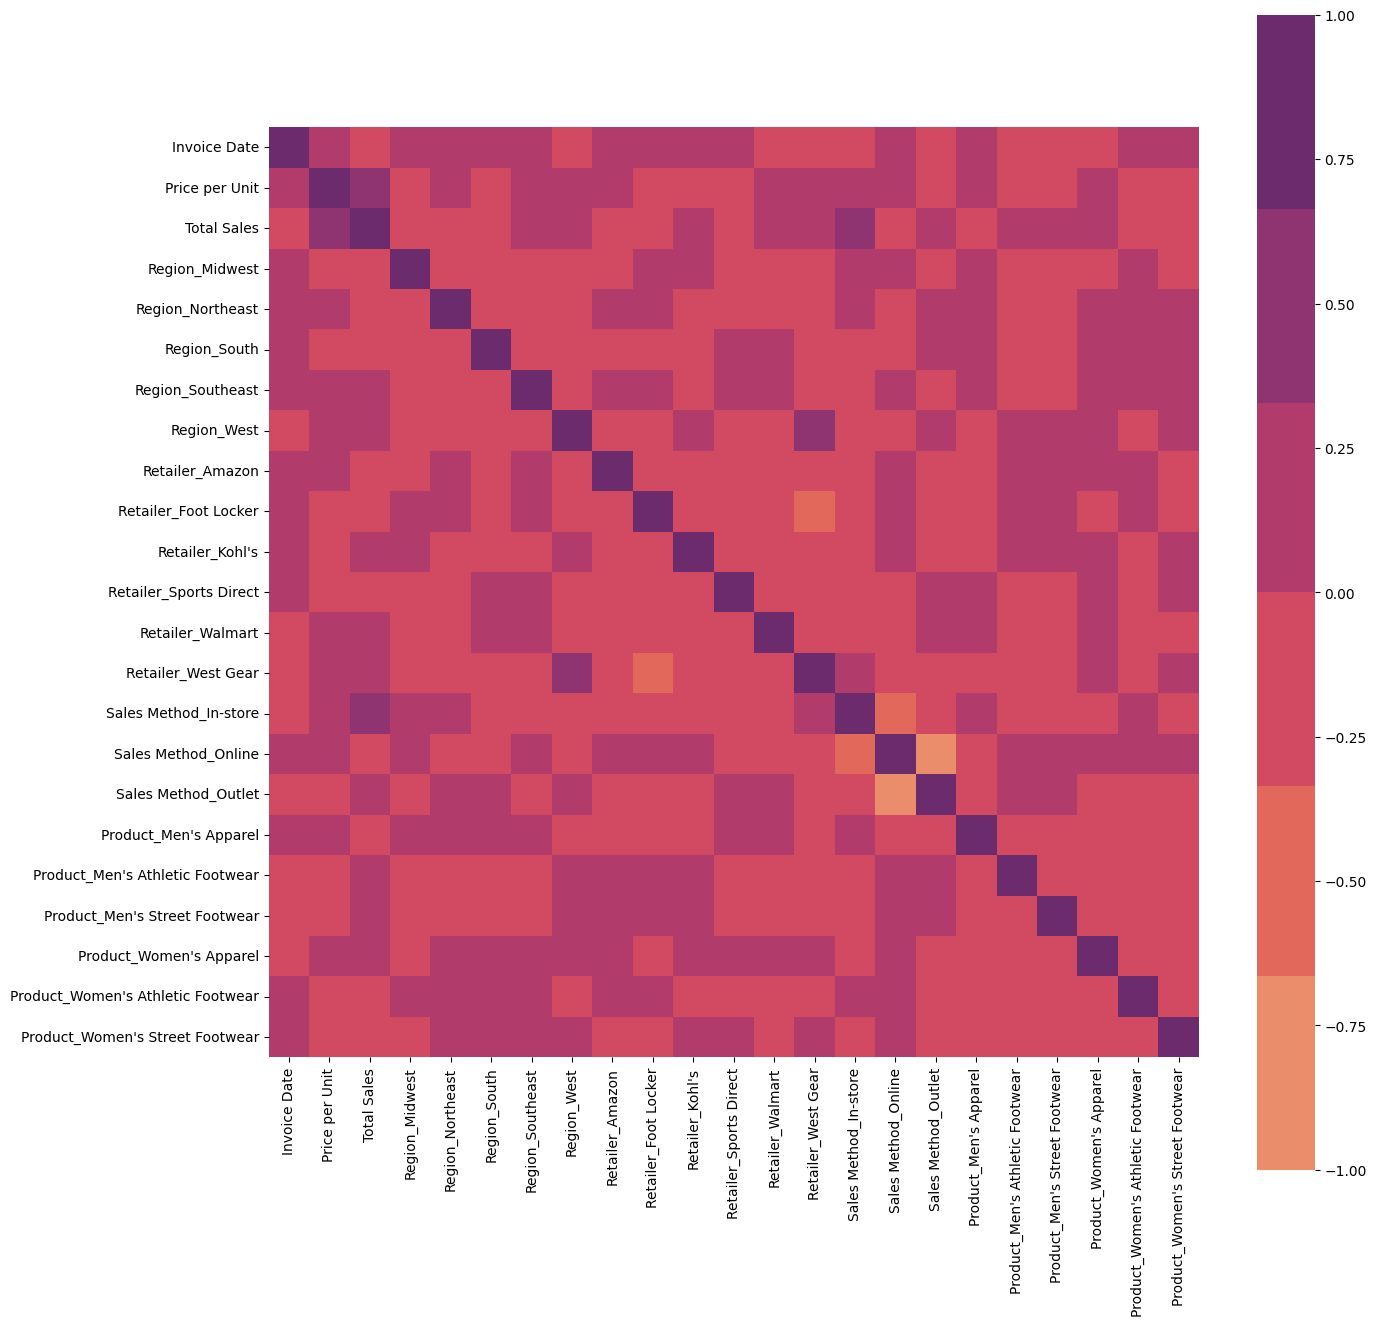

In [ ]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, cmap=sns.color_palette("flare"), vmin=-1, center=0, square=True)

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Total Sales", title="Distribution of sales")
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Price per Unit", title="Distribution of PPU")
fig.show()

In [ ]:
#names = ['Retailer', 'Region', 'Product', 'Sales Method'] 
#for name in names:
        #df[name].hist(bins=df[name].nunique() * 2 - 1, label=name)
        #plt.legend()
        #plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.sample(frac=1).reset_index(drop=True)
df2

,Invoice Date,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,1612569600,15.0,37500.0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,1592956800,75.0,9375.0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,1610236800,41.0,4633.0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1620086400,45.0,78750.0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,1619049600,54.0,12582.0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,1609977600,30.0,90000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9644,1629158400,40.0,120000.0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
9645,1620864000,43.0,4472.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9646,1620777600,42.0,3948.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X, y = df2.drop('Total Sales', axis=1), df2["Total Sales"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:

bst = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.2,
    objective='reg:squarederror',
    eval_metric="rmse"
)

# fit model
bst.fit(X_train, y_train)

preds = bst.predict(X_test)

mean_absolute_error(y_test, preds)
#accuracy = model_score(X_test, y_test)

35913.63003460978

In [ ]:
dfn = df.copy()
dfn["Total Sales"] = (dfn["Total Sales"] - dfn["Total Sales"].min()) / (dfn["Total Sales"].max() - dfn["Total Sales"].min()) 
dfn

,Invoice Date,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,1577836800,50.0,0.727273,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1577923200,50.0,0.606061,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1578009600,40.0,0.484848,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1578096000,45.0,0.463636,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1578182400,60.0,0.654545,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,1611446400,50.0,0.003879,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
9644,1611446400,41.0,0.005218,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9645,1613952000,41.0,0.009144,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
9646,1613952000,42.0,0.003564,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [ ]:

fig = px.histogram(dfn, x="Total Sales", color_discrete_sequence=['indianred'])
fig.show()

In [ ]:
fig = px.histogram(df, x="Total Sales")
fig.show()

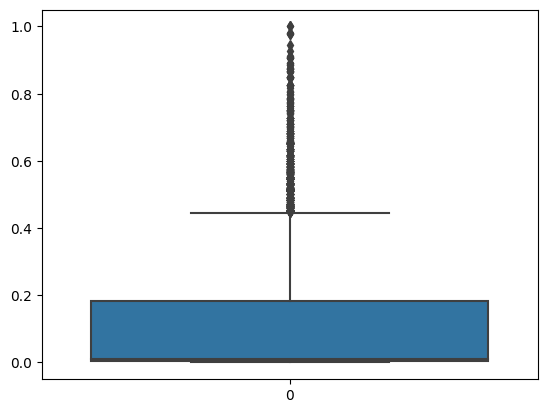

In [ ]:
sns.boxplot(dfn["Total Sales"])
sns.set(rc={'figure.figsize':(17, 12)})

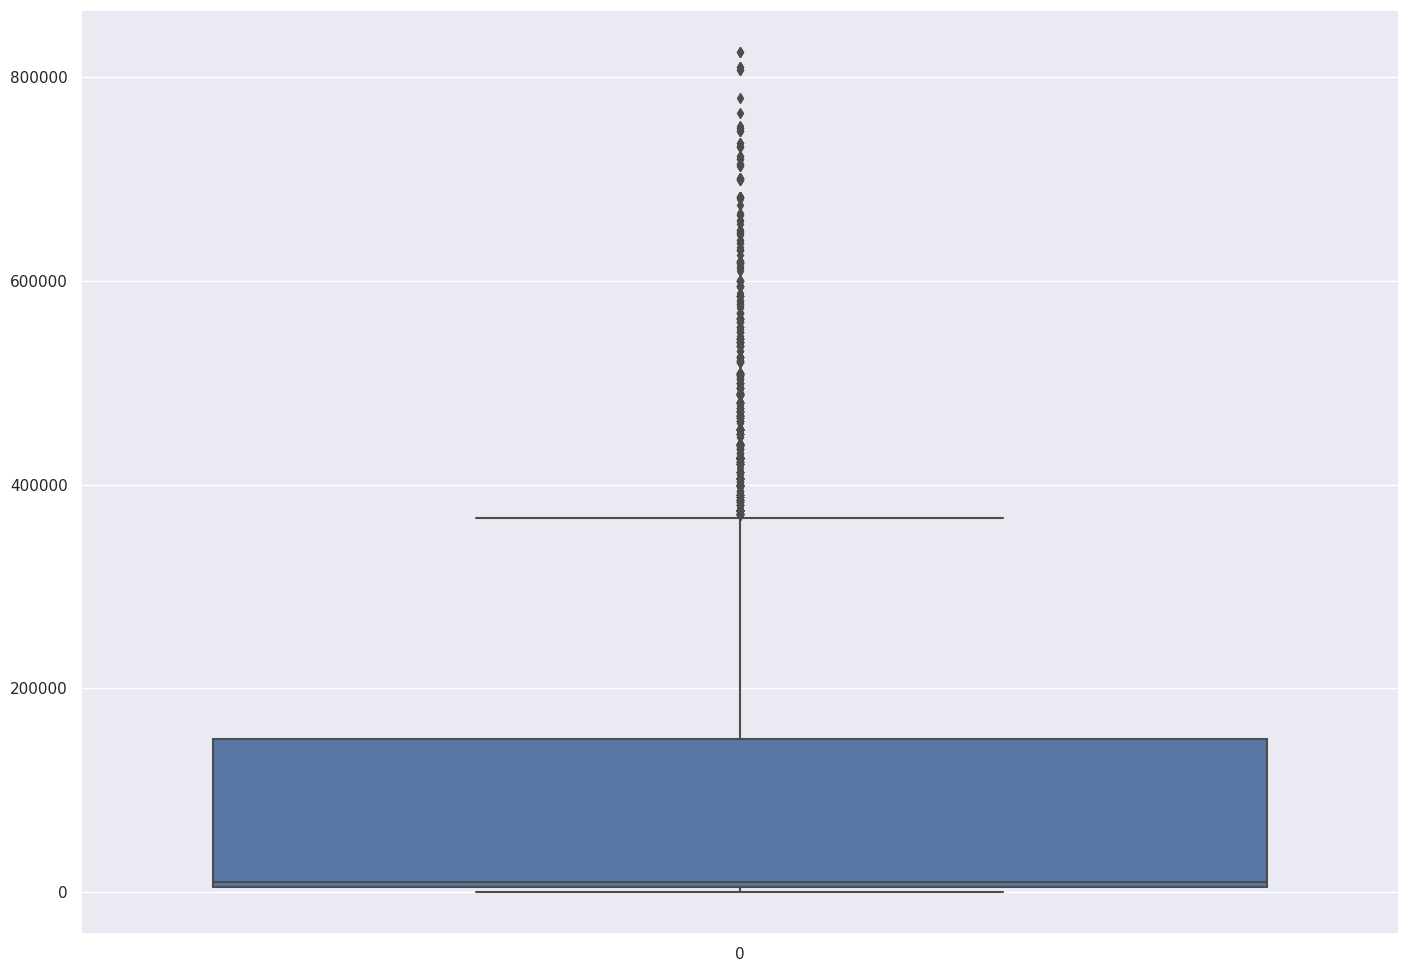

In [ ]:
sns.boxplot(df["Total Sales"])
sns.set(rc={'figure.figsize':(17, 12)})

In [ ]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv("adidas_sales.csv", sep=";")

data = df.copy()

df = df.drop(columns=['Retailer ID', 'Units Sold', 'Operating Profit', 'Operating Margin', 'State', 'City'])

data2unix = lambda x: int(datetime.datetime.strptime(x, '%d.%m.%Y').timestamp())
df['Invoice Date'] = df['Invoice Date'].apply(data2unix)

mask_dollar = lambda x: float(str(x).replace("$", "").replace(u"\xa0", "").replace(",", "."))
df["Total Sales"] = df["Total Sales"].apply(mask_dollar)
df["Price per Unit"] = df["Price per Unit"].apply(mask_dollar)

df = pd.get_dummies(df, columns=["Region", "Retailer", "Sales Method", "Product"], dtype=int)

def iqr_normalize(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return (column - q1) / iqr

numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].apply(iqr_normalize)

print(df)


      Invoice Date  Price per Unit  Total Sales  Region_Midwest  \
0        -1.957346            0.75     4.087574             NaN   
1        -1.952607            0.75     3.401446             NaN   
2        -1.947867            0.25     2.715319             NaN   
3        -1.943128            0.50     2.595247             NaN   
4        -1.938389            1.25     3.675897             NaN   
...            ...             ...          ...             ...   
9643     -0.113744            0.75    -0.007235             NaN   
9644     -0.113744            0.30     0.000346             NaN   
9645      0.023697            0.30     0.022570             NaN   
9646      0.023697            0.35    -0.009019             NaN   
9647      0.023697           -0.30    -0.012676             NaN   

      Region_Northeast  Region_South  Region_Southeast  Region_West  \
0                  inf           NaN               NaN          0.0   
1                  inf           NaN               Na

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("adidas_sales.csv", sep=";")
data = data.drop(data.columns[7:9], axis=1)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in data.columns:
    data = data[(data[col] >= lower_bound[col]) & (data[col] <= upper_bound[col])]
print(data)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bbb0613e-2f22-4925-8a20-4af8834a2a03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>